Importing the dependencies


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data collection & Analysis


In [5]:
#loading data set from csv to pad=ndas dataframe
big_mart_data = pd.read_csv('C:/Users/Admin/Downloads/Data_Analytics_Projects/BigMart_Sales_Prediction_ML/Train_Data_Set.csv')


In [7]:
big_mart_data = pd.read_csv('C:/Users/Admin/Downloads/Data_Analytics_Projects/BigMart_Sales_Prediction_ML/Train_Data_Set.csv')

In [8]:
#first 5 rows
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#printing the number rows and coulnms
big_mart_data.shape

(8523, 12)

Categorical features:
-Item_Identifier
-Item_Fat_Content 
-Item_Type
-Outlet_Identifier
-Outlet_Size
-Outlet_Location_Type
-Outlet_Type

In [8]:
#information about the data set
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling missing values
Mean --> average values
Mode--> Most repeated value

In [9]:
big_mart_data['Item_Weight'].mean()

np.float64(12.857645184135976)

In [31]:
#filling values in "Item_Weight" coulmn with "Mean" value
big_mart_data['Item_Weight'] = big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean())

Replacing the missing values 'Outlet_Size' with mode

In [27]:
mode_of_outlet_size = big_mart_data.pivot_table(
    values='Outlet_Size',
    index='Outlet_Type',
    aggfunc=lambda x: x.mode()[0]
)


In [28]:
print(mode_of_outlet_size)

                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium


In [23]:
missing_vales = big_mart_data['Outlet_Size'].isnull()

In [24]:
print(missing_vales)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [29]:
big_mart_data.loc[missing_vales, 'Outlet_Size'] = big_mart_data.loc[missing_vales, 'Outlet_Type'].apply(lambda x : mode_of_outlet_size)

In [32]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [34]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [5]:
sns.set()

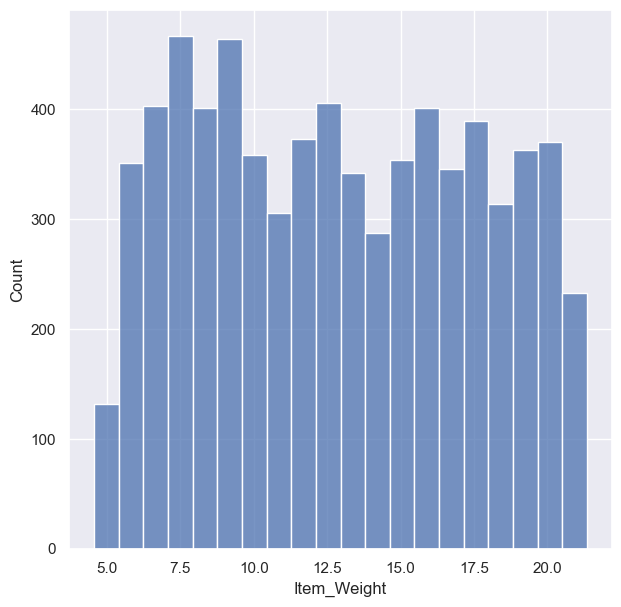

In [10]:
#Item_Weight distribution
plt.figure(figsize=(7,7))
sns.histplot(big_mart_data['Item_Weight'])
plt.show()

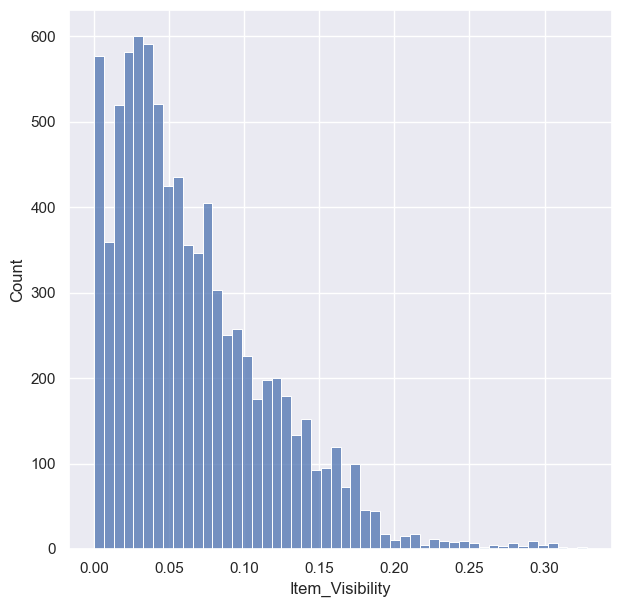

In [11]:
#Item_Visibility distribution
plt.figure(figsize=(7,7))
sns.histplot(big_mart_data['Item_Visibility'])
plt.show()

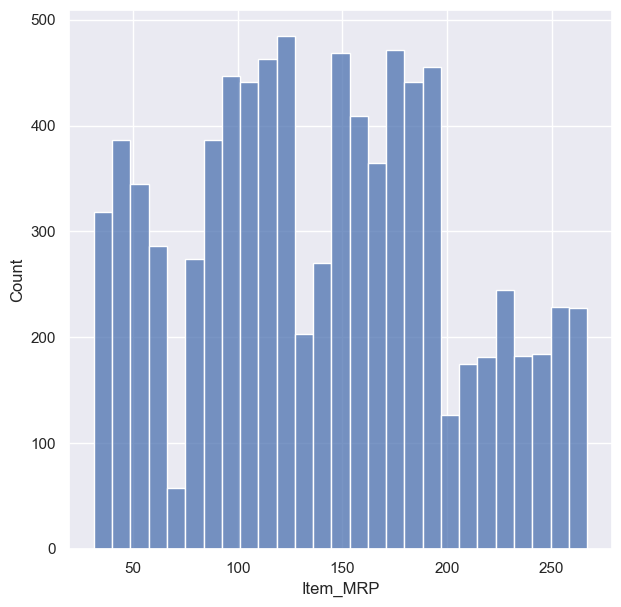

In [12]:
#Item_MRP distribution
plt.figure(figsize=(7,7))
sns.histplot(big_mart_data['Item_MRP'])
plt.show()

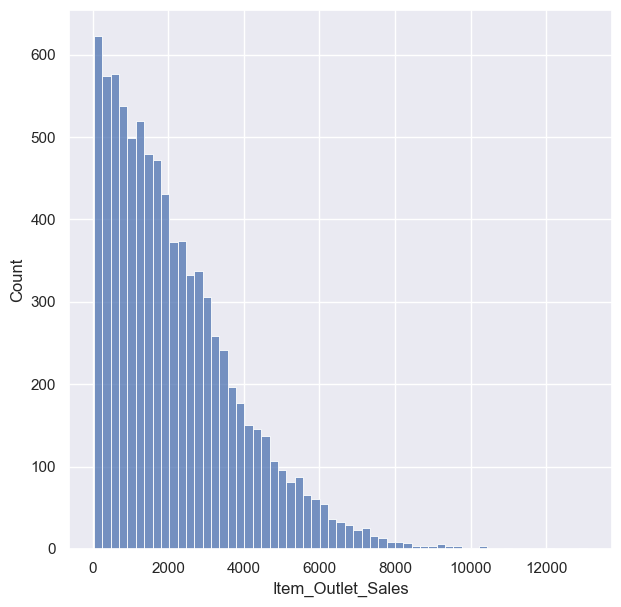

In [13]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(7,7))
sns.histplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

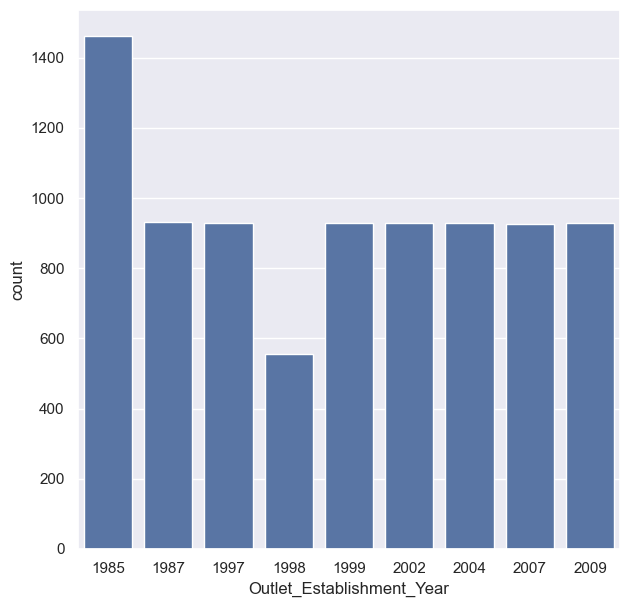

In [17]:
#Outlet_Establishment_Year distribution
plt.figure(figsize=(7,7))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

In [18]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


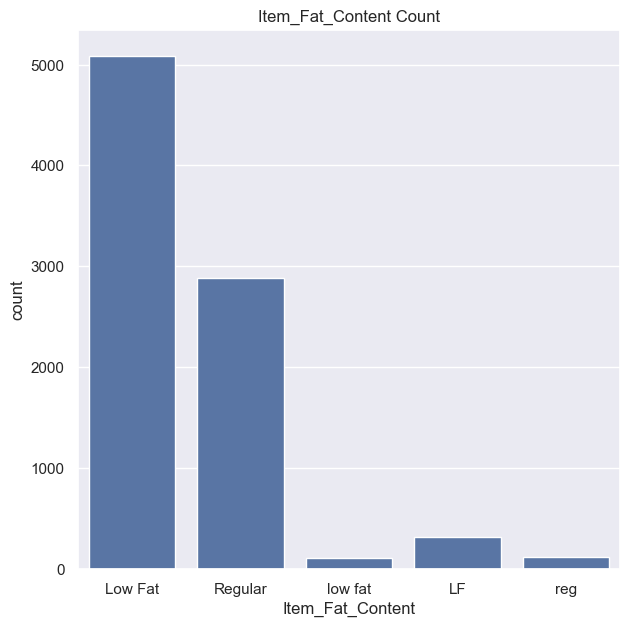

In [22]:
#Item_Fat_Content counting
plt.figure(figsize=(7,7))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.title('Item_Fat_Content Count')
plt.show()

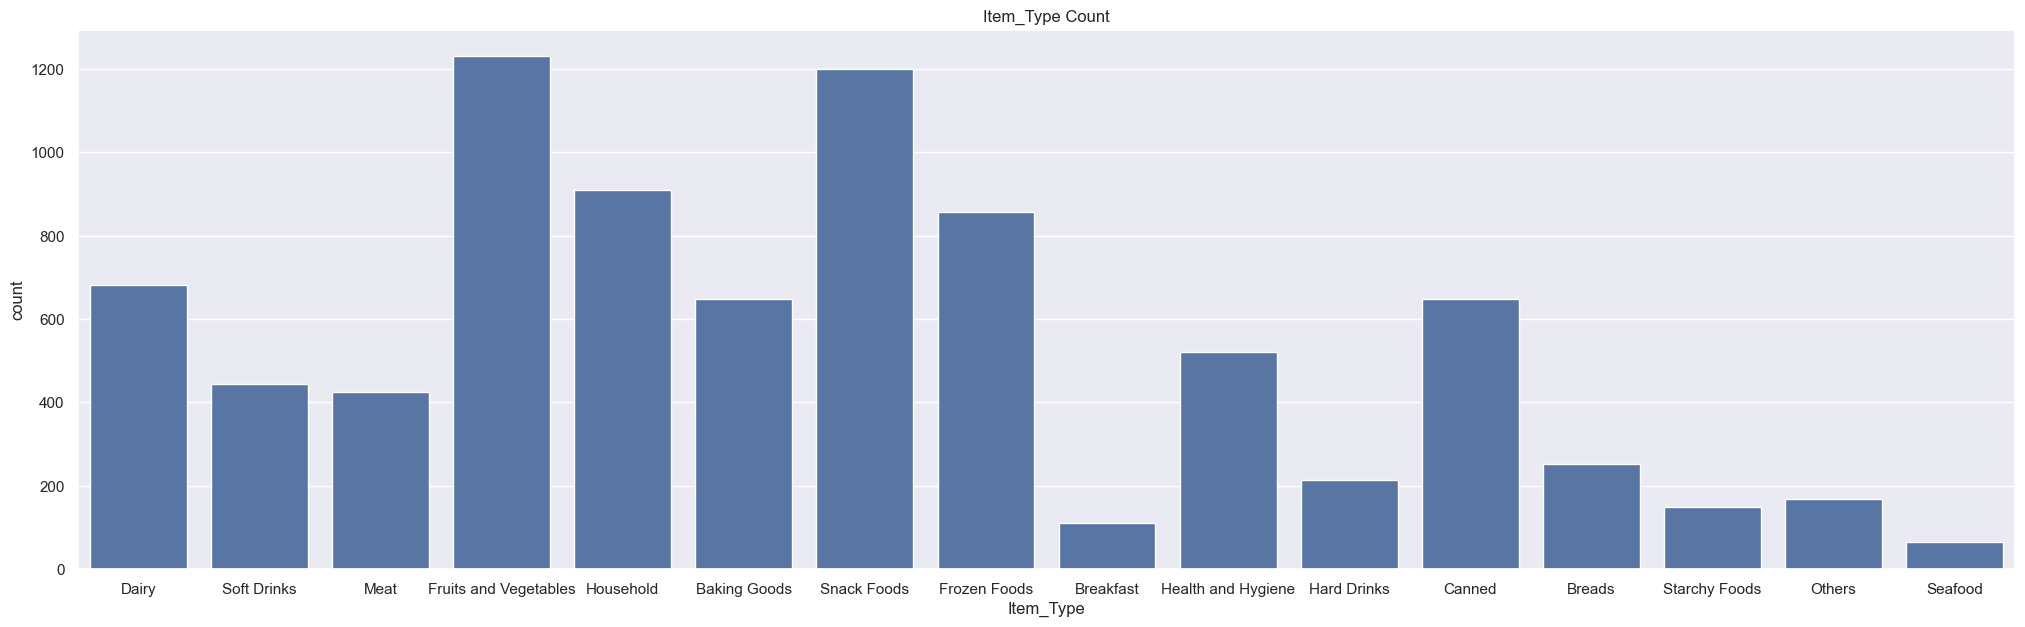

In [26]:
#Item_Type counting
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.title('Item_Type Count')
plt.show()

Text(0.5, 1.0, 'Outlet_Size Count')

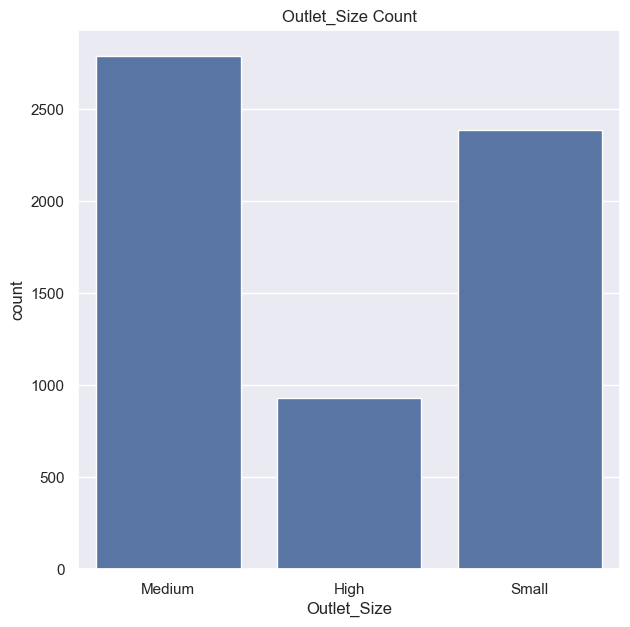

In [32]:
#Outlet_Size counting
plt.figure(figsize = (7,7,))
sns.countplot(x='Outlet_Size',data=big_mart_data)
plt.title('Outlet_Size Count')


Text(0.5, 1.0, 'Outlet_Location_Type Count')

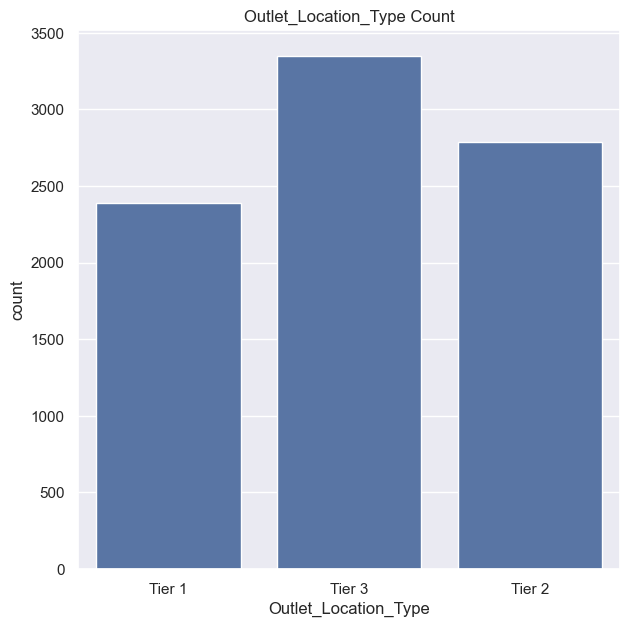

In [31]:
#Outlet_Location_Type Count
plt.figure(figsize=(7,7))
sns.countplot(x='Outlet_Location_Type', data=big_mart_data)
plt.title('Outlet_Location_Type Count')

Text(0.5, 1.0, 'Outlet_Type Count')

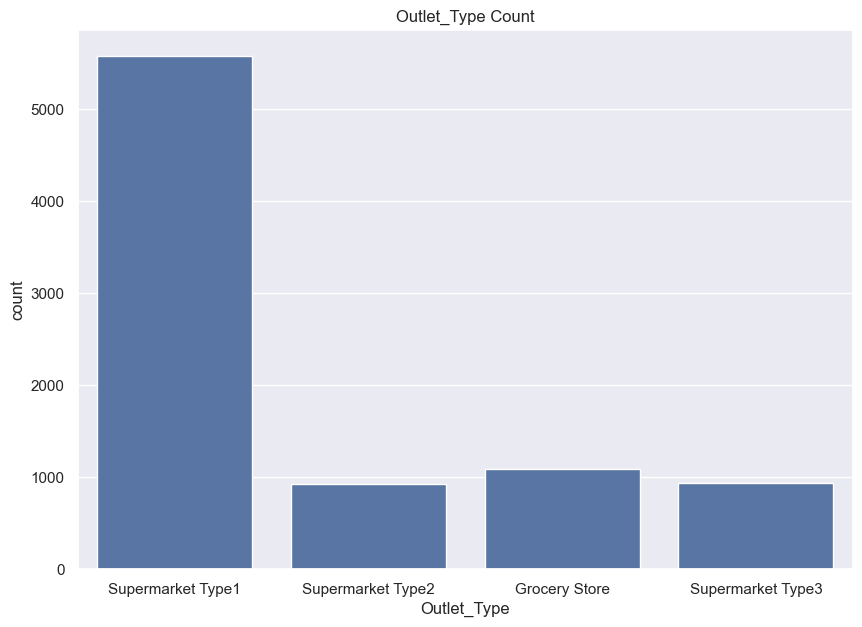

In [35]:
#Outlet_Type Counting
plt.figure(figsize=(10,7))
sns.countplot(x='Outlet_Type', data=big_mart_data)
plt.title('Outlet_Type Count')

In [38]:
#changing the lF, low fat into Low Fat and reg into Regular
big_mart_data.replace({'Item_Fat_Content' : {'low fat':'Low Fat', 'LF' : 'Low Fat', 'reg': 'Regular'}}, inplace = True) 

Text(0.5, 1.0, 'Item_Fat_Content')

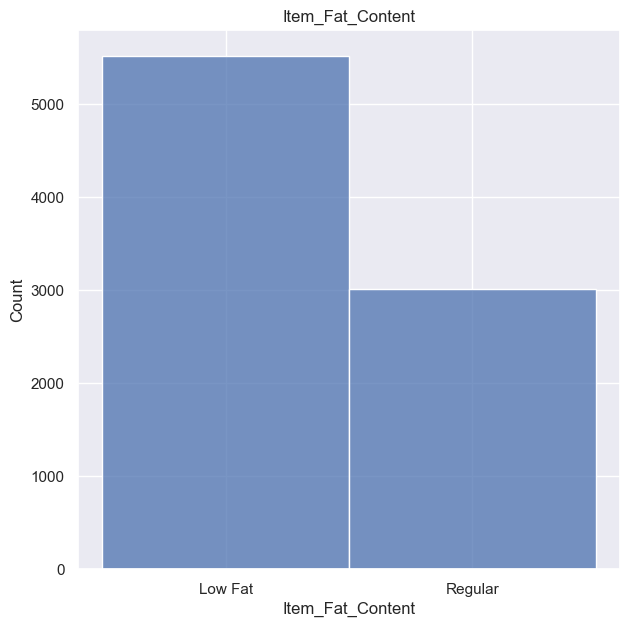

In [39]:
#Item_Fat_Content distribution after replacing lF, low fat into Low Fat and reg into Regular
plt.figure(figsize=(7,7))
sns.histplot(big_mart_data['Item_Fat_Content'])
plt.title('Item_Fat_Content')

Label Encoding

In [40]:
encoder = LabelEncoder()

In [56]:
#converting all text data numerical values uning encoder.fit_transform
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])


In [57]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting features and Target

In [59]:
x = big_mart_data.drop(columns = 'Item_Outlet_Sales')
y = big_mart_data['Item_Outlet_Sales']

In [60]:
print(x)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [61]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into Training data & Testing data using train_test_split

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [68]:
print(x.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine Learning Model Training

XGBoost Regressor

In [69]:
regressor = XGBRegressor()

In [83]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

In [84]:
# prediction on traing data
training_data_prediction = regressor.predict(X_train)

In [85]:
# R square value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [95]:
print('R Squared Value = ', r2_train)

R Squared Value =  0.8763290886996713


In [87]:
# prediction on testing data
training_data_prediction = regressor.predict(X_test)

In [88]:
# R square value
r2_test = metrics.r2_score(Y_test, training_data_prediction)

In [94]:
print('R Squared Value = ', r2_test)

R Squared Value =  0.5549156994494057
